In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the datasets
customers = pd.read_csv("DATA SET/Customers.csv")
products = pd.read_csv("DATA SET/Products.csv")
transactions = pd.read_csv("DATA SET/Transactions.csv")

In [3]:
# Displaying basic information about the datasets
print("Customers Data:")
customers.info()
customers.head()

Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
print("\nProducts Data:")
products.info()
products.head()


Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
print("\nTransactions Data:")
transactions.info()
transactions.head()


Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


<p>We can see in all the three datasets info there is equal number of Non-Null Count , hence there is no missing values in the given data set</p>
<p>And also there is no duplicate cloumns in all the three data sets, therefore data cleaning is not required</p>

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


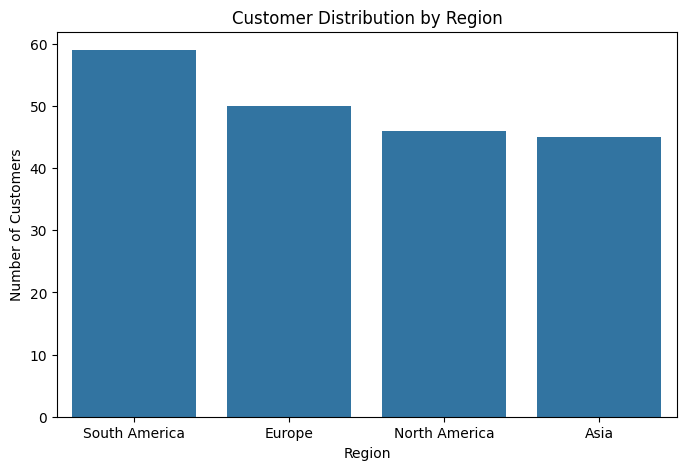

In [6]:
# Customer Distribution by Region
plt.figure(figsize=(8, 5))
region_counts = customers['Region'].value_counts()
print(region_counts)
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Customer Distribution by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.show()


ProductID
P059    19
P029    17
P054    16
P061    16
P062    16
P079    16
P057    15
P096    15
P022    15
P049    15
Name: count, dtype: int64


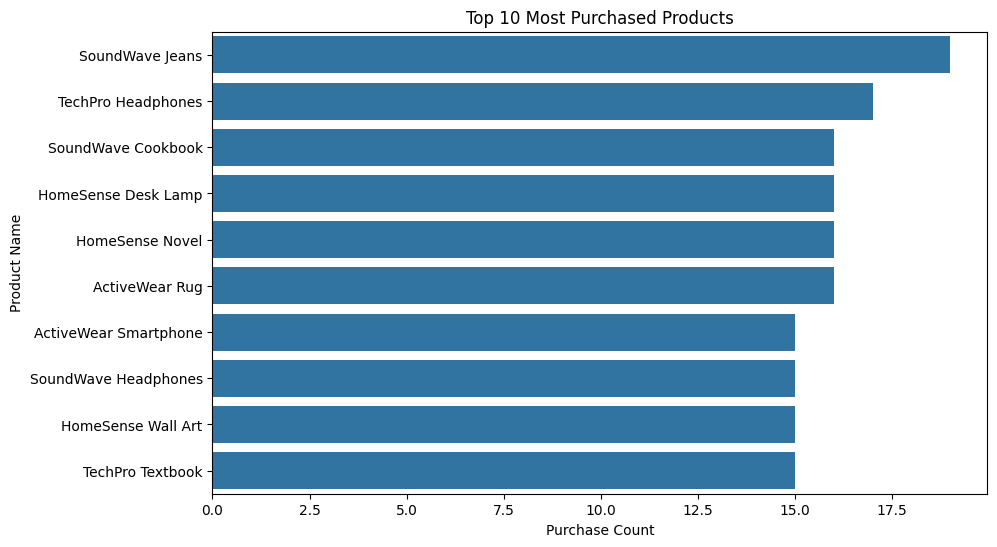

In [7]:
# Top 10 Most Purchased Products
plt.figure(figsize=(10, 6))
top_products = transactions['ProductID'].value_counts().head(10)
print(top_products)
top_product_names = products.loc[products['ProductID'].isin(top_products.index), ['ProductID', 'ProductName']]
top_product_names = top_product_names.set_index('ProductID').reindex(top_products.index)
top_product_names['Counts'] = top_products.values
top_product_names.reset_index(inplace=True)
sns.barplot(x="Counts", y="ProductName", data=top_product_names)
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Purchase Count")
plt.ylabel("Product Name")
plt.show()

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


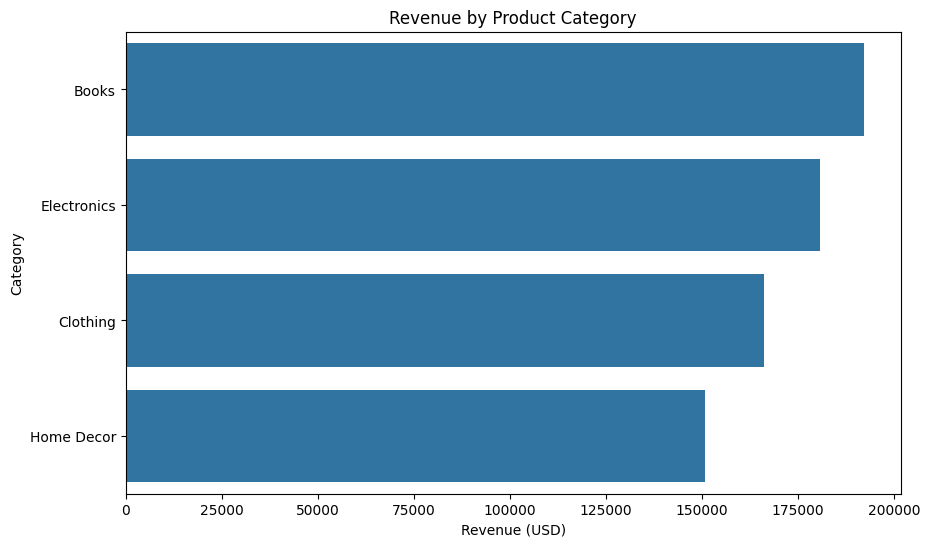

In [10]:
# Revenue by Product Category
# Droping the Price column from the transactions df before merging
transactions = transactions.drop(columns=['Price'], errors='ignore')

# Mergeing the DataFrames on ProductID
transactions = transactions.merge(products, on='ProductID', suffixes=('', '_product'))

# Group by Category and calculate revenue
category_revenue = transactions.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_revenue)
# Plot the revenue by product category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index)
plt.title("Revenue by Product Category")
plt.xlabel("Revenue (USD)")
plt.ylabel("Category")
plt.show()

MonthYear
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: TransactionID, dtype: int64


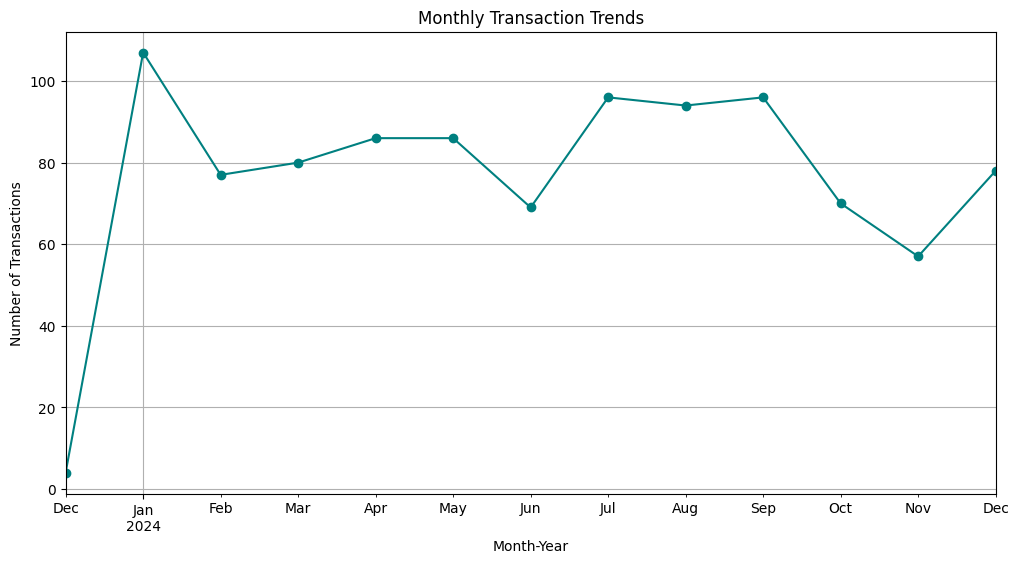

In [22]:
# Monthly Transaction Trends
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['MonthYear'] = transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions.groupby('MonthYear')['TransactionID'].count()
print(monthly_transactions)
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Transaction Trends")
plt.xlabel("Month-Year")
plt.ylabel("Number of Transactions")
plt.grid()
plt.show()

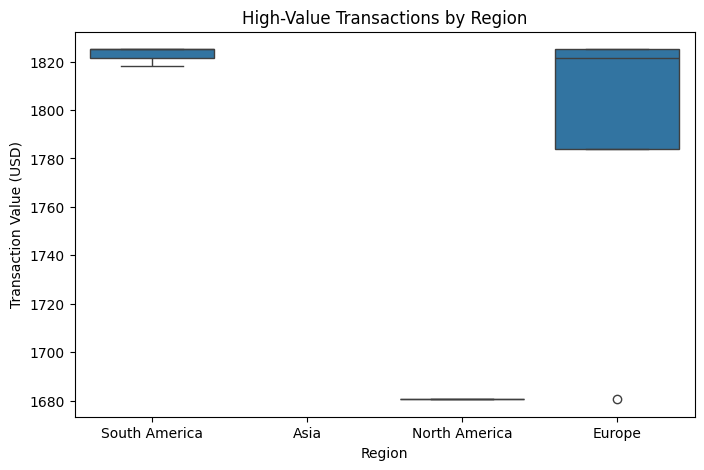

In [23]:
# High-Value Transactions
high_value = transactions[transactions['TotalValue'] > transactions['TotalValue'].quantile(0.95)]
plt.figure(figsize=(8, 5))
sns.boxplot(data=high_value, x=customers['Region'], y='TotalValue')
plt.title("High-Value Transactions by Region")
plt.xlabel("Region")
plt.ylabel("Transaction Value (USD)")
plt.show()